In [387]:
import scipy.io as sio
mat_contents = sio.loadmat('./ex7data2.mat')
X = mat_contents['X']

In [388]:
import matplotlib.pyplot as plt
import numpy as np

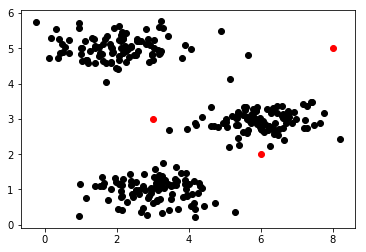

In [389]:
plt.scatter(X[:,0],X[:,1],color='black')
initial_centroids = np.array([[3,3], [6,2],[8,5]])
plt.scatter(initial_centroids[:,0],initial_centroids[:,1],color='r')

# finding closest centroid to data and assising the closest centroid

In [390]:
def closest_Centroid(X,centroids):    
    ind=np.zeros((len(X),1))
    for i in range(len(X)):
        distances=np.zeros((len(centroids),1))
        for j in range(len(centroids)):
               distances[j,:]=np.sqrt(np.sum(np.square(X[i,:]-centroids[j,:])))
        val=np.min(distances)
        ind[i,:]=list(distances).index(val)
    return ind
    

# computing centroid mean


In [391]:
def centroid_mean(ind,X):   
    ind=ind.astype("int")
    mean=np.zeros((3,2))
    for k in range(3):
        pos=[]
        for i in range(len(ind)):
            if k==ind[i]:
                pos.append(X[i,:])
        pos=np.array(pos)
        mean[k,:]=np.sum(pos,axis=0)/len(pos)
    return mean

In [392]:
# centroid_result=[]
def compute(centroids):    
    for i in range(10):    
        ind=closest_Centroid(X,centroids)
        centroids=centroid_mean(ind,X)
#         centroid_result.append(centroids)
    return centroids,ind

In [393]:
mean,ind=compute(initial_centroids)
mean=np.array(mean)

In [394]:
zero_cluster=np.zeros((98,2))
one_cluster=np.zeros((102,2))
two_cluster=np.zeros((100,2))
for k in range(3):
        pos=[]
        for i in range(len(ind)):
            if k==ind[i]:
                pos.append(X[i,:])
        pos=np.array(pos)
        if k==0:
            zero_cluster=pos
        if k==1:
            one_cluster=pos
        if k==2:
            two_cluster=pos

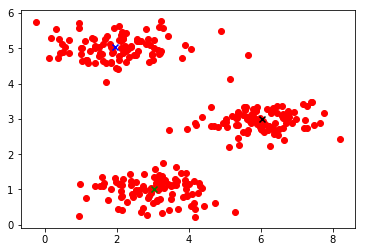

In [395]:
plt.scatter(X[:,0],X[:,1],color='red')
initial_centroids = np.array([[3,3], [6,2],[8,5]])
plt.scatter(mean[0,0],mean[0,1],color='b',marker='x')
plt.scatter(mean[1,0],mean[1,1],color='g',marker='x')
plt.scatter(mean[2,0],mean[2,1],color='black',marker='x')


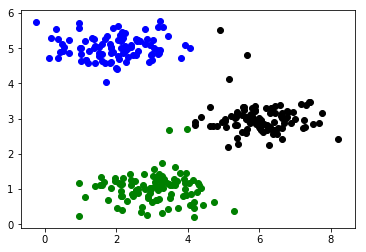

In [396]:
plt.scatter(zero_cluster[:,0],zero_cluster[:,1],color='b',marker='o')
plt.scatter(one_cluster[:,0],one_cluster[:,1],color='g',marker='o')
plt.scatter(two_cluster[:,0],two_cluster[:,1],color='black',marker='o')